<a href="https://colab.research.google.com/github/NicCaterino/ML/blob/main/ML_Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches


from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression




Data Loading

In [ ]:
def load_data(csv_filepath):
    """
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    """
    data = pd.read_csv(csv_filepath)
    # Headers' list:
    headers = data.columns  # 'x' for inputs, 'y' for labels
    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]
    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [
        [
            float(feature)
            for feature in feature_vec.replace("[", "").replace("]", "").split()
        ]
        for feature_vec in x_data
    ]
    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers) > 1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None
    return X, Y

X_1, Y_1 = load_data("./Datasets/dataset1.csv")

T-SNE on full dataset


In [ ]:
# Lista delle perplexity da testare
perplexities = [5, 30, 50]  # Modifica le perplexity
compute_TSNE = True # Modifca per ricalcolare TSNE su tutto Dataset

if(tmp == True):
  # Calcolo di t-SNE con diverse perplexity
  for perplexity in perplexities:
      tsne = TSNE(n_components=2, perplexity=perplexity)
      X_1_tsne = tsne.fit_transform(X_1)

      # Plot dei risultati di t-SNE con la perplexity corrente
      plt.figure(figsize=(8, 6))
      plt.scatter(X_1_tsne[:, 0], X_1_tsne[:, 1], s=10)
      plt.title(f"t-SNE Visualization with Perplexity={perplexity}")
      plt.xlabel('Componente 1')
      plt.ylabel('Componente 2')
      plt.show()

PCA visualization, in order to extract the most informative features

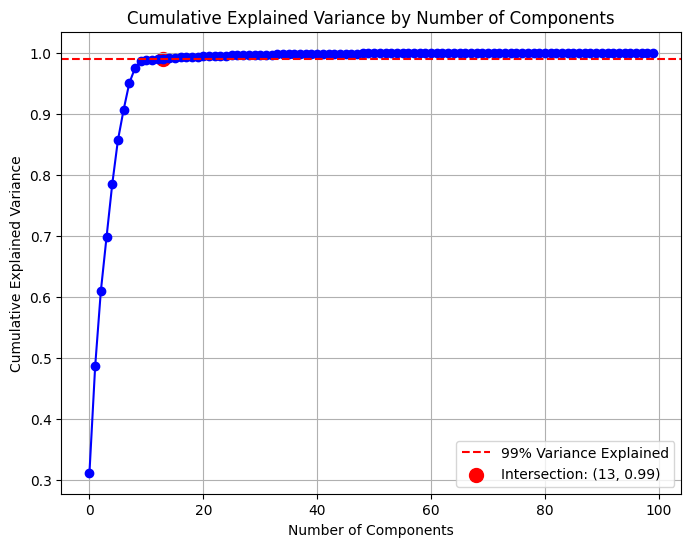

In [ ]:
# Inizializzazione PCA
pca = PCA()
pca.fit(X_1)


# Calcolo della varianza spiegata cumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Trova l'indice del punto in cui la curva della varianza raggiunge il 99%
idx_99 = np.argmax(cumulative_variance >= 0.99)

# Valori delle coordinate x e y dell'intersezione
x_intersection = idx_99
y_intersection = cumulative_variance[idx_99]

# Plot della varianza spiegata cumulativa con soglia al 99% e indicazione dell'intersezione
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.99, color='r', linestyle='--', label='99% Variance Explained')
plt.scatter(x_intersection, y_intersection, color='red', s=100, label=f'Intersection: ({x_intersection}, {y_intersection:.2f})')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()# Trova il numero ottimale di componenti per spiegare la maggior parte della varianza (es. 95%)
n_components = np.argmax(cumulative_variance >= 0.99) + 1


TSNE on the most informative dimensions and a % of the Dataset


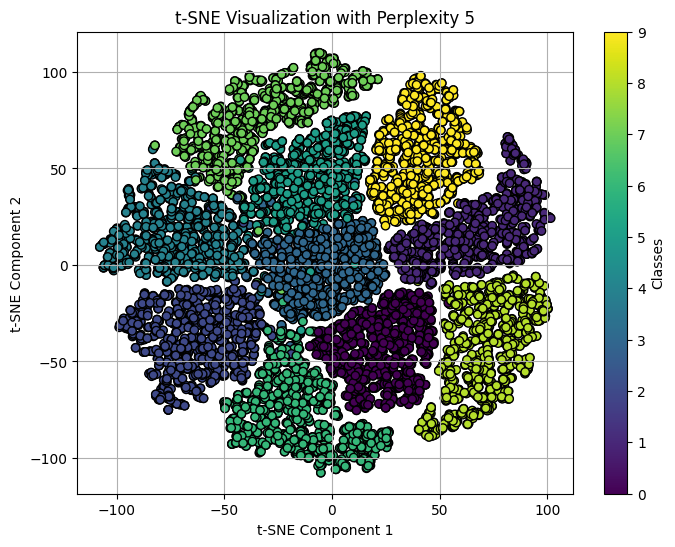

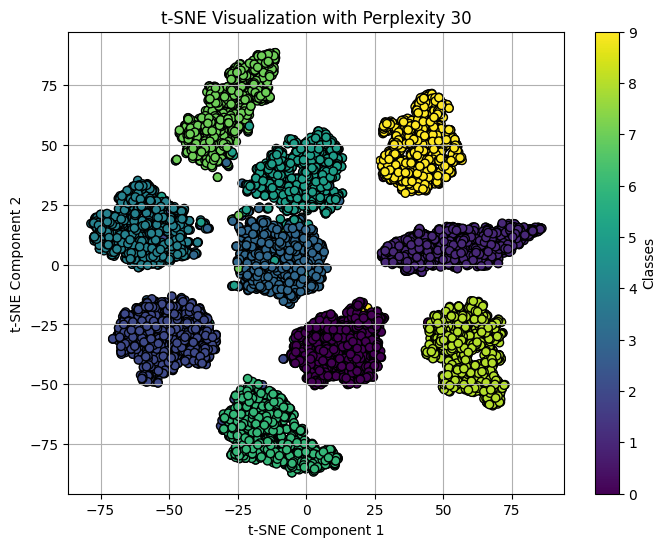

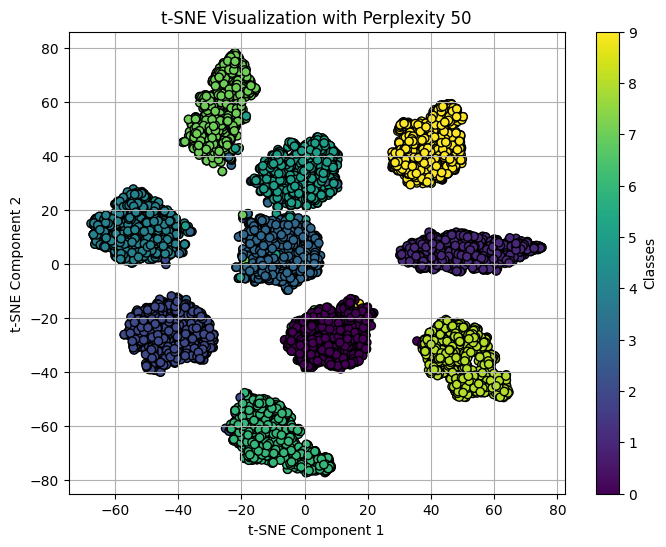

In [ ]:
# Considera solo una percentuale del dataset
percentile = 20
sample_size = int((percentile / 100) * len(X_1))  # Calcolo della dimensione del sottoinsieme
# Utilizza le prime n_components uscite da PCA
n_components_pca = 13 # In questo caso 13
X_1_pca = PCA(n_components=n_components_pca).fit_transform(X_1)

# Esegui t-SNE con diverse perplexity
perplexities = [5, 30, 50]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_1_tsne = tsne.fit_transform(X_1_pca[:sample_size])  # Esegui t-SNE su una percentuale del dataset

    # Visualizzazione t-SNE
    plt.figure(figsize=(8, 6))
    plt.scatter(X_1_tsne[:, 0], X_1_tsne[:, 1], c=Y_1[:sample_size], cmap='viridis', edgecolor='k')
    plt.title(f"t-SNE Visualization with Perplexity {perplexity}")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Classes')
    plt.grid(True)
    plt.show()

    # Suddivisione del dataset in training e testing set
    X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.33)


Check if the data is Balanced

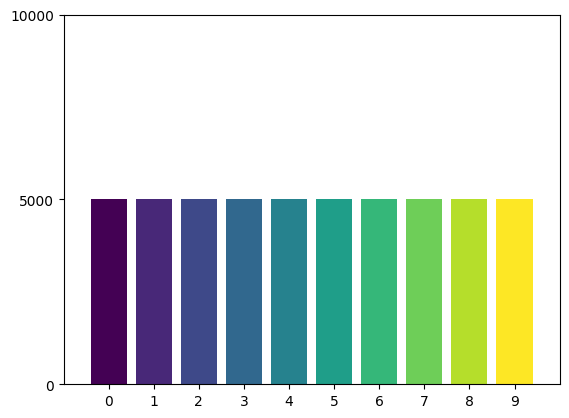

In [ ]:
n_per_class = [sum(Y_1 == i) for i in range(10)]
n_class = np.unique(Y_1)
plt.bar(n_class,n_per_class,color=plt.cm.viridis(np.linspace(0, 1, len(set(Y_1)))))
plt.axis([-1,len(n_class),0,max(n_per_class)*2])
plt.xticks(range(0,len(set(Y_1))))
plt.yticks(range(0,(max(n_per_class)*2)+1,max(n_per_class)))
plt.show()

Classification model choice

In [ ]:
# Suddivisione del dataset in training e testing set
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.33)

# Lista dei modelli da testare
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('SVM', SVC(kernel='linear')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('Decision Tree',DecisionTreeClassifier())
]

# Addestramento e valutazione dei modelli
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, predictions))
    print('-' * 30)

# Cross-validation per ulteriore valutazione dei modelli
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    print(f'Mean cross-validation accuracy for {name}: {np.mean(scores)}')


Model: Random Forest
Accuracy: 0.9874545454545455
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1642
           1       1.00      0.99      1.00      1621
           2       0.99      0.98      0.99      1658
           3       0.96      0.98      0.97      1633
           4       0.99      0.99      0.99      1637
           5       0.98      0.96      0.97      1654
           6       0.99      1.00      0.99      1688
           7       0.99      0.99      0.99      1639
           8       1.00      1.00      1.00      1644
           9       0.99      1.00      0.99      1684

    accuracy                           0.99     16500
   macro avg       0.99      0.99      0.99     16500
weighted avg       0.99      0.99      0.99     16500

------------------------------
Model: SVM
Accuracy: 0.9864848484848485
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1642
           

Best model Random forest - Confusion Matrix computation

Accuracy: 0.9874545454545455


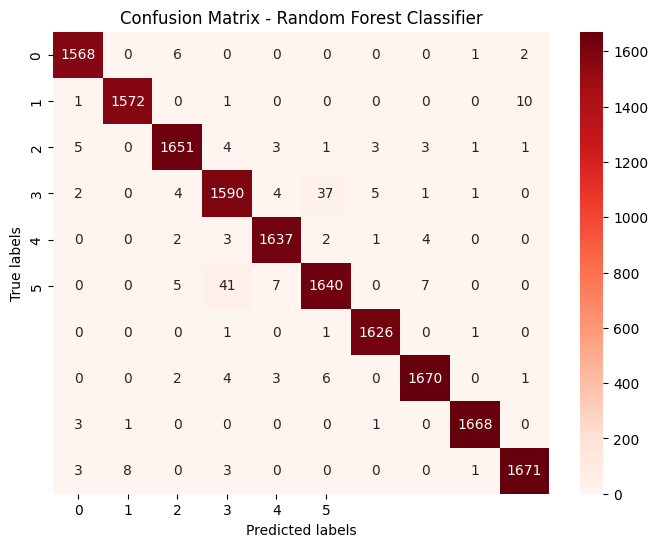

In [ ]:
# Creazione del modello Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestramento del modello
rf_classifier.fit(X_train, y_train)

# Predizioni sul testing set
predictions = rf_classifier.predict(X_test)

# Valutazione delle prestazioni
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizzazione della confusion matrix con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Large size dataset
## Data Visualizations


  Import of the "large" dataset

In [ ]:
X_2, y_2 = load_data("./Datasets/dataset2.csv")

PCA

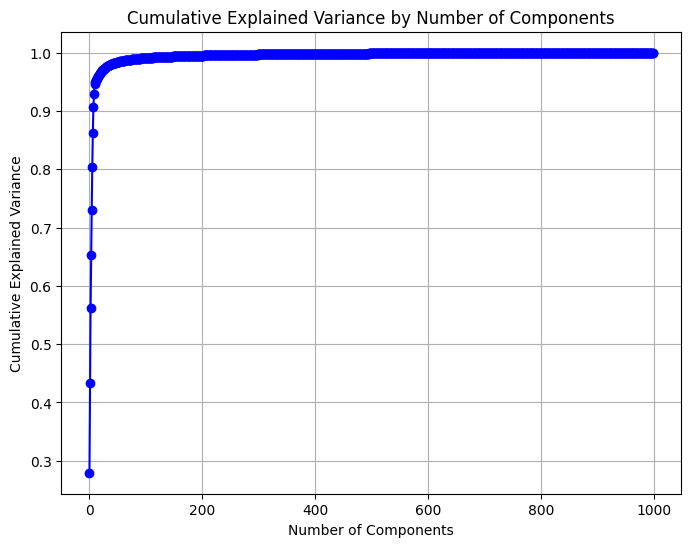

Numero ottimale di componenti per spiegare almeno il 99% della varianza: 91


In [ ]:
# Inizializzazione PCA
pca = PCA()
pca.fit(X_2)

# Calcolo della varianza spiegata cumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot della varianza spiegata cumulativa
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
# Trova il numero ottimale di componenti per spiegare la maggior parte della varianza (es. 95%)
n_components = np.argmax(cumulative_variance >= 0.99) + 1

print(f"Numero ottimale di componenti per spiegare almeno il 99% della varianza: {n_components}")


t-SNE on PCA dimension(91 dimensions explain the 99% of the variance)

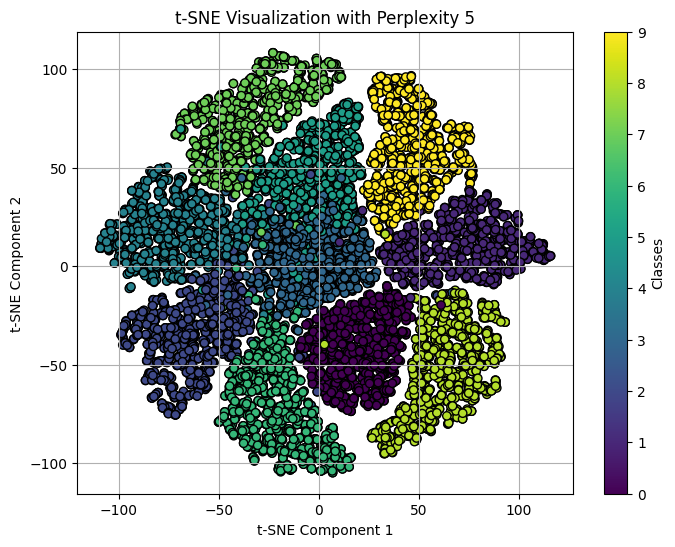

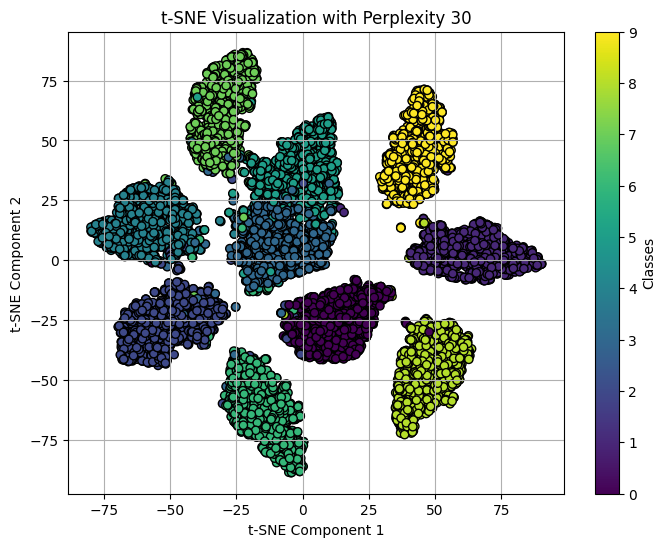

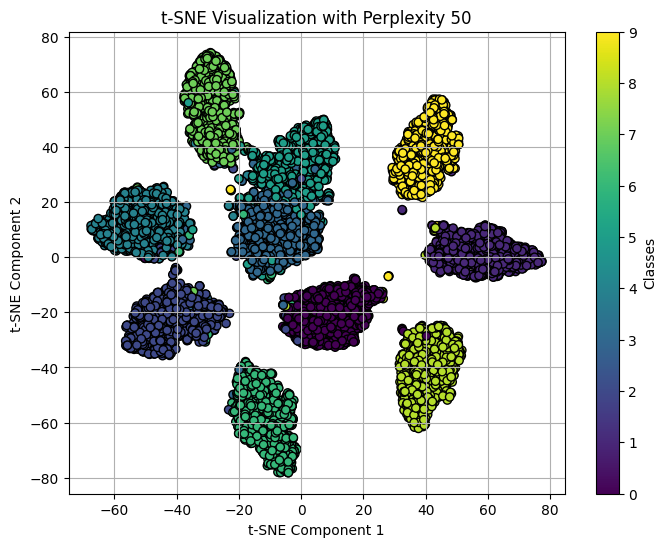

In [ ]:


# Considera solo una percentuale del dataset (ad esempio, il 20%)
percentile = 20
sample_size = int((percentile / 100) * len(X_2))  # Calcolo della dimensione del sottoinsieme

# Utilizza le prime n_components uscite da PCA (nel caso, 99)
n_components_pca = 99
X_2_pca = PCA(n_components=n_components_pca).fit_transform(X_2)

# Inizializzazione di diverse perplexity per t-SNE
perplexities = [5, 30, 50]  # Puoi modificare le perplexity in base alle tue esigenze

# Esegui t-SNE con diverse perplexity
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_2_tsne = tsne.fit_transform(X_2_pca[:sample_size])  # Esegui t-SNE su una percentuale del dataset

    # Visualizzazione t-SNE
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2_tsne[:, 0], X_2_tsne[:, 1], c=y_2[:sample_size], cmap='viridis', edgecolor='k')
    plt.title(f"t-SNE Visualization with Perplexity {perplexity}")
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Classes')
    plt.grid(True)
    plt.show()


check if the data is balanced

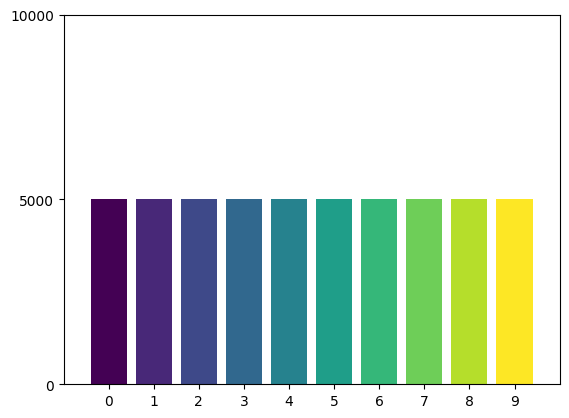

In [ ]:
n_per_class = [sum(y_2 == i) for i in range(10)]
n_class = np.unique(y_2)
plt.bar(n_class,n_per_class,color=plt.cm.viridis(np.linspace(0, 1, len(set(y_2)))))
plt.axis([-1,len(n_class),0,max(n_per_class)*2])
plt.xticks(range(0,len(set(y_2))))
plt.yticks(range(0,(max(n_per_class)*2)+1,max(n_per_class)))
plt.show()


Performance metrics on Model selection + K-FOLD Cross Validation



In [ ]:
# Suddivisione del dataset in training e testing set
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.33)

    # Lista dei modelli da testare
models = [
        ('Random Forest', RandomForestClassifier(n_estimators=100)),
        ('SVM', SVC(kernel='linear')),
        ('SVM RBF Kernel', SVC(kernel='rbf')),
        ('LDA', LinearDiscriminantAnalysis())

    ]

    # Addestramento e valutazione dei modelli
for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        print(f'Model: {name}')
        print(f'Accuracy: {accuracy}')
        print(classification_report(y_test, predictions))
        print('-' * 30)


Model: Random Forest
Accuracy: 0.9710909090909091
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.99      0.99      0.99      1662
           2       0.98      0.98      0.98      1640
           3       0.91      0.94      0.92      1696
           4       0.97      0.97      0.97      1659
           5       0.94      0.91      0.92      1620
           6       0.99      0.98      0.99      1641
           7       0.97      0.98      0.98      1659
           8       0.99      0.99      0.99      1693
           9       0.99      0.99      0.99      1580

    accuracy                           0.97     16500
   macro avg       0.97      0.97      0.97     16500
weighted avg       0.97      0.97      0.97     16500

------------------------------
Model: SVM
Accuracy: 0.9687878787878788
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           

In [ ]:
    # Cross-validation per ulteriore valutazione dei modelli
    for name, model in models:
        scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
        print(f'Mean cross-validation accuracy for {name}: {np.mean(scores)}')

Mean cross-validation accuracy for Random Forest: 0.9732537313432836
Mean cross-validation accuracy for SVM: 0.9685373134328359
Mean cross-validation accuracy for SVM RBF Kernel: 0.9739402985074627
Mean cross-validation accuracy for LDA: 0.9731940298507464


migliore svm rbf di poco, controllo confusion matrix

Accuracy: 0.9722424242424242


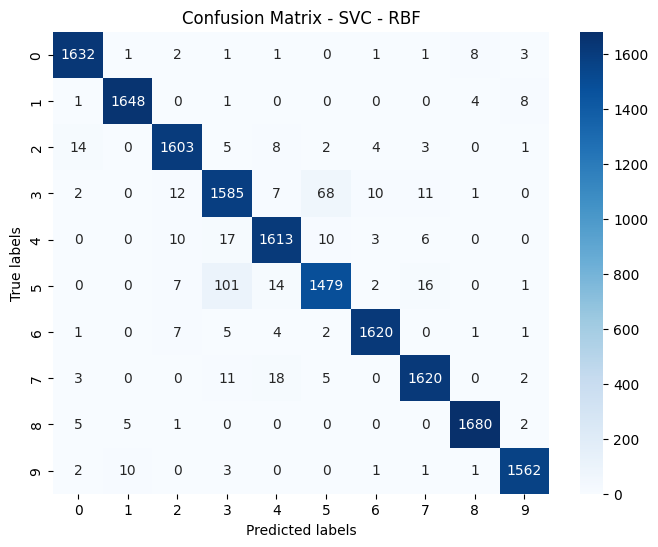

In [ ]:
# Creazione del modello Random Forest Classifier
svc_classifier = SVC(kernel='rbf')

# Addestramento del modello
svc_classifier.fit(X_train, y_train)

# Predizioni sul testing set
predictions = svc_classifier.predict(X_test)

# Valutazione delle prestazioni
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizzazione della confusion matrix con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVC - RBF')
plt.show()